<a href="https://colab.research.google.com/github/yehuda-yu/ML_Projects/blob/main/Trees_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course 70938 - Machine learning in earth and environmental sciences
## Tutoring04 - Classification trees
### Lecturer: Efrat Morin (Institute of Earth Sciences, Hebrew University)

Connect to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Imports

In [ ]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

Set the path to the relevant folder in your drive

In [ ]:
PATH_ROOT = "/content/drive/MyDrive/gdrive_folder/Courses/course70938ML/Tutoring04/"

Read and present a small dataset (from the Iris dataset) for exploring split selection

In [ ]:
df = pd.read_csv(PATH_ROOT+'iris_tmp.csv')
df.style

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_code
0,5.100000,3.500000,1.400000,0.200000,Setosa,0
1,4.900000,3.000000,1.400000,0.200000,Setosa,0
2,7.000000,3.200000,4.700000,1.400000,Versicolor,1
3,6.400000,3.200000,4.500000,1.500000,Versicolor,1
4,6.300000,3.300000,6.000000,2.500000,Virginica,2
5,5.800000,2.700000,5.100000,1.900000,Virginica,2


**Test yourself:**

**We compare two potential splits using the Gini index**

Split sepal_width with a threshold: 3.25 cm:

Fraction of cases with sepal_width<=threshold = ?

For this sub-sample, Gini impurity = 1 - fraction_Setosa^2 - fraction_Versicolor^2 - fraction_Virginia^2 = ?

Fraction of cases with sepal_width>threshold = ?

For this sub-sample, Gini impurity = 1 - fraction_Setosa^2 - fraction_Versicolor^2 - fraction_Virginia^2 = ?

What is the Gini index for this split (the weighted average of Gini impurity)?

Repeat the same analysis for a split threshold of 4.6 cm for petal_length.

*Which of the two options would be better for a split?*





Your answer? 

In [ ]:
tresh= df[df["sepal.width"]<=3.25]
print(f"Fraction of cases with sepal_width<=threshold = {len(tresh)/len(df)}")
print(f"Fraction of cases with sepal_width>threshold = {1-len(tresh)/len(df)}")

Fraction of cases with sepal_width<=threshold = 0.6666666666666666
Fraction of cases with sepal_width>threshold = 0.33333333333333337


Now, let's continue with the air quality dataset.

Read the data file

In [ ]:
df = pd.read_csv(PATH_ROOT+'AQbench_dataset_modified.csv')

Split into train, validation and test

In [ ]:
df_train = df[df['dataset']=='train']
df_val = df[df['dataset']=='val']
df_test = df[df['dataset']=='test']

Arrange the data in numpy arrays

In [ ]:
label_col =  'o3_category'

feature_cols = [col for col in df.columns if (is_numeric_dtype(df[col]) and ('o3' not in col))]

X_train = np.array([df_train[col] for col in feature_cols]).T
y_train = np.array(df_train[label_col])
X_val = np.array([df_val[col] for col in feature_cols]).T
y_val = np.array(df_val[label_col])
X_test = np.array([df_test[col] for col in feature_cols]).T
y_test = np.array(df_test[label_col])


Use sklearn classification tree
Read about this class here: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#

We want first to learn an unpruned tree, with splits based on entropy (later on you can try the gini measure, ehich is the default here).

Fit the tree to the training dataset.

Make predictions for the training and validation datasets.

Print some relevant metrcis for classification (see https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), such as precision, recall, accuracy.

Are you happy with the results? if not, why?

Apply pruning using max_depth (pre-pruning) or ccp_alpha (post-pruning). To better understand how the cost complexity pruning works, you can read https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

Find hyperparameters (of pruning) that you are happy with the results.


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",ccp_alpha = 0.01,max_depth=5) # Set the arguments of the classifier with/without pruning
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)

print("Training: Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Training: Precision:",metrics.precision_score(y_train, y_train_pred))
print("Training: Recall:",metrics.recall_score(y_train, y_train_pred))

# -------- validation-----------------#
clf.fit(X_val, y_val)
y_val_pred = clf.predict(X_val)

print("Validation: Accuracy:",metrics.accuracy_score(y_val, y_val_pred))
print("Validation: Precision:",metrics.precision_score(y_val, y_val_pred))
print("Validation: Recall:",metrics.recall_score(y_val, y_val_pred))
# TODO: print other metrics, for the training and the validation datasets


Training: Accuracy: 0.8007765830346476
Training: Precision: 0.7834036568213784
Training: Recall: 0.5205607476635514
Validation: Accuracy: 0.8213644524236984
Validation: Precision: 0.7331288343558282
Validation: Recall: 0.6809116809116809


Plot the tree

Print performance metrics for the test dataset

Test: Accuracy: 0.7318385650224215


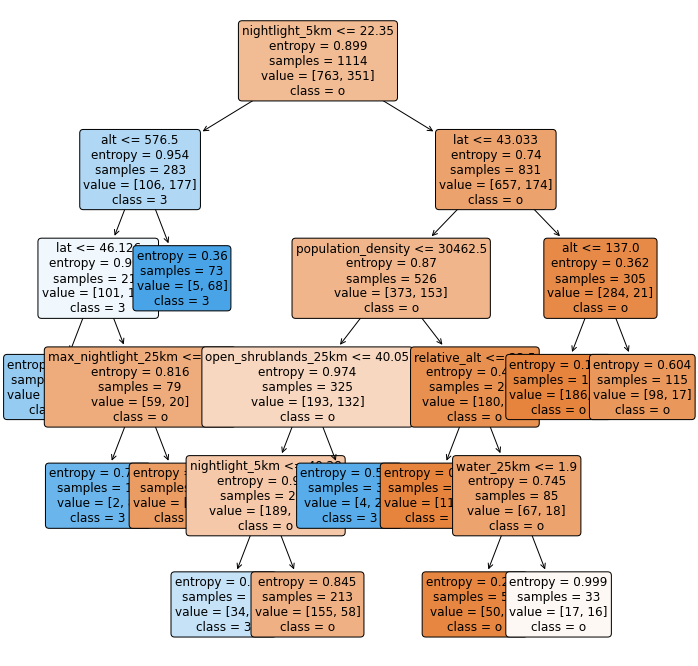

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf,  
               feature_names = feature_cols, 
               class_names = label_col,
               fontsize=12,
               rounded=True, 
               filled = True)
plt.show

y_train_test = clf.predict(X_test)

print("Test: Accuracy:",metrics.accuracy_score(y_test, y_train_test))
# TODO: compute more metrics of interest

Apply the sklearn random forest learning

Read more about it in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

As above, look for the best hyperparameters.

Note that for random forest you can use the out-of-bag sample (oob) to validate each tree prediction. 

In [ ]:
clf = RandomForestClassifier(oob_score = True) # Set the arguments of the classifier
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
# TODO:  compute y_val_pred

print("Training: Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
# TODO: print other metrics, for the training and the validation datasets


Training: Accuracy: 0.9997013142174432


Appply to the test dataset and compute metrics

In [ ]:
y_train_test = clf.predict(X_test)
# TODO:  compute y_val_pred

print("Test: Accuracy:",metrics.accuracy_score(y_test, y_train_test))
print("Training: Precision:",metrics.precision_score(y_train, y_train_pred))
print("Training: Recall:",metrics.recall_score(y_train, y_train_pred))

Test: Accuracy: 0.8080717488789237
Training: Precision: 1.0
Training: Recall: 0.9990654205607477


In [ ]:
#val RandomTree:
clf_val = RandomForestClassifier( oob_score = True)
clf_val.fit(X_val, y_val)
y_val_pred = clf_val.predict(X_val)
print("Training: Accuracy:",metrics.accuracy_score(y_val, y_val_pred))
print("Training: Precision:",metrics.precision_score(y_val, y_val_pred))
print("Training: Recall:",metrics.recall_score(y_val, y_val_pred))

Training: Accuracy: 1.0
Training: Precision: 1.0
Training: Recall: 1.0


In [ ]:
#Test RandomTree:
y_train_test = clf.predict(X_test)
print("Test: Accuracy:",metrics.accuracy_score(y_test, y_train_test))
print("Test: Precision:",metrics.precision_score(y_test, y_train_test))
print("Test: Recall:",metrics.recall_score(y_test, y_train_test))

Test: Accuracy: 0.8080717488789237
Test: Precision: 0.754601226993865
Test: Recall: 0.6473684210526316
